### Load and check saved Ultrasound model

In [1]:
import numpy as np
from pathlib import Path
import os
# set here the directory of the logged folder
os.chdir('/Users/fabianp/Documents/Private Projekte/Optoaucustic Soundwaves/di-lab' + 
         '/reports/shallow_model_2018_11_12_16_15')
import matplotlib.pyplot as plt
import torch
# import here the correct model file and the correct class name
import models.cnn_skipC_model as cnn_skipC_model
import pickle
from data.data_loader import ProcessData
model_name = 'shallow_model'
model_import_name = 'shallow_model_final.pt'

In [2]:
# specify comparison file
read_file = ('/Users/fabianp/Documents/Private Projekte/Optoaucustic Soundwaves' + 
            '/di-lab/data/processed/processed_all/ultrasound/US_Study_26_Scan_16_ch3')

# initialize the data_loader
data_loader = ProcessData(process_raw_data=False,do_augment=False, add_augment=False,
                          image_type='US', get_scale_center=False, single_sample=True,
                          train_ratio=0.1)

In [3]:
# initialize the model and load saved parameters
the_model = cnn_skipC_model.cnn_skipC_model()
the_model.load_state_dict(torch.load(model_import_name, map_location='cpu'))
# set the state of the model to eval()
the_model.eval()

cnn_skipC_model(
  (conv1): Conv2d(1, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (conv2): Conv2d(32, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (conv3): Conv2d(64, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (conv4): Conv2d(128, 256, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (deconv1): ConvTranspose2d(256, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (deconv2): ConvTranspose2d(128, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (deconv3): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (deconv4): ConvTranspose2d(32, 1, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (criterion): MSELoss()
)

In [10]:
def plot_us_channel(im_input, im_target, im_predict):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('input image')
    plt.imshow(im_input[:,:], cmap = 'gray')


    plt.subplot(1,3,2)
    plt.title('target image')
    plt.imshow(im_target[:,:], cmap = 'gray')
    
    plt.subplot(1,3,3)
    plt.title('predict image')
    plt.imshow(im_predict[:,:], cmap = 'gray')
    

In [4]:
scale_params_low, scale_params_high = data_loader.load_params(param_type="scale_params", dir_params='')
mean_image_low, mean_image_high = data_loader.load_params(param_type="mean_images", dir_params='')

In [5]:
target_im = data_loader._load_file_to_numpy(full_file_name=read_file, image_sign='US_high')
input_im = data_loader._load_file_to_numpy(full_file_name=read_file, image_sign='US_low')

In [6]:
scale_center_X = data_loader.scale_and_center(np.expand_dims(input_im, axis=0), scale_params_low, mean_image_low)
scale_center_X = np.array([scale_center_X])
scale_center_X = scale_center_X.reshape(scale_center_X.shape[1], scale_center_X.shape[0],
                                        scale_center_X.shape[2], scale_center_X.shape[3])

In [7]:
predict_im = the_model(torch.from_numpy(scale_center_X))

In [8]:
predict_new = predict_im.detach().numpy()[0,:,:,:]
predict_rescaled = data_loader.scale_and_center_reverse(predict_new,
                                                  scale_params_high, mean_image_high)

print(predict_rescaled.shape)

(1, 401, 401)


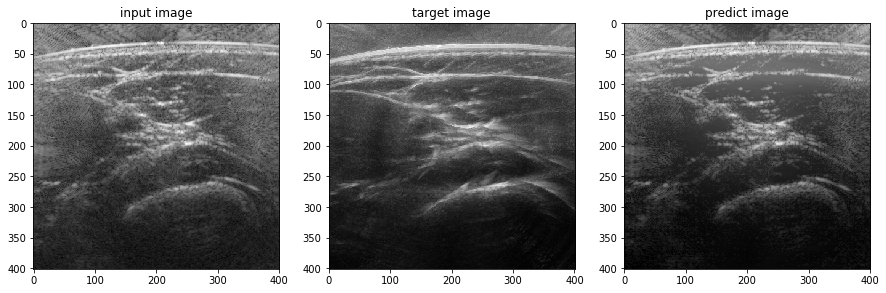

In [11]:
plot_us_channel(im_input=input_im, im_target=target_im, im_predict=predict_rescaled[0,:,:])